<a href="https://colab.research.google.com/github/AakarshDev0p/NLP/blob/main/2403A52262_NLP_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
df = pd.read_csv('/content/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
df['sentiment'].value_counts()


,count
sentiment,
positive,25000
negative,25000


# **Text Preprocessing**

In [9]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)          # remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)       # remove punctuation/numbers
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)


In [10]:
df['clean_review'] = df['review'].apply(preprocess_text)
df.head()


,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


# **Create Separate Corpora**

In [11]:
positive_reviews = df[df['sentiment'] == 'positive']['clean_review']
negative_reviews = df[df['sentiment'] == 'negative']['clean_review']


# **TF-IDF Vectorization**

In [12]:
tfidf_pos = TfidfVectorizer(max_features=5000)
tfidf_neg = TfidfVectorizer(max_features=5000)

pos_tfidf_matrix = tfidf_pos.fit_transform(positive_reviews)
neg_tfidf_matrix = tfidf_neg.fit_transform(negative_reviews)


# **Extract Top TF-IDF Terms**

In [13]:
def get_top_tfidf_terms(tfidf_matrix, feature_names, top_n=15):
    mean_scores = np.mean(tfidf_matrix.toarray(), axis=0)
    scores_df = pd.DataFrame({
        'term': feature_names,
        'score': mean_scores
    })
    return scores_df.sort_values(by='score', ascending=False).head(top_n)


In [14]:
top_pos_terms = get_top_tfidf_terms(
    pos_tfidf_matrix,
    tfidf_pos.get_feature_names_out()
)

top_neg_terms = get_top_tfidf_terms(
    neg_tfidf_matrix,
    tfidf_neg.get_feature_names_out()
)


In [15]:
top_pos_terms

,term,score
2907,movie,0.052988
1678,film,0.049693
3092,one,0.032154
2576,like,0.025680
1906,good,0.024893
1937,great,0.023754
4224,story,0.021713
3876,see,0.021254
3553,really,0.020255
4510,time,0.019733


In [16]:
top_neg_terms


,term,score
2881,movie,0.060893
1651,film,0.046613
3065,one,0.032243
2554,like,0.029952
320,bad,0.026218
1881,good,0.024079
1470,even,0.023544
4952,would,0.022632
3524,really,0.021838
4488,time,0.020238


# **Visualization: Side-by-Side Bar Charts**

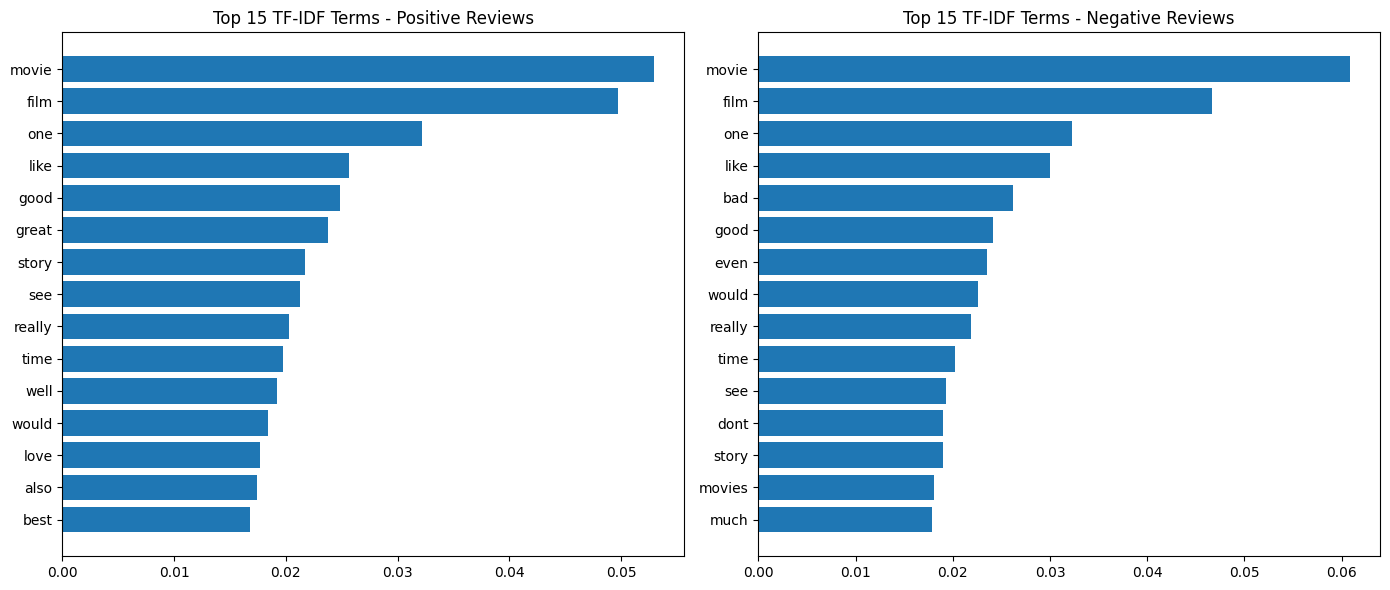

In [17]:
plt.figure(figsize=(14,6))

# Positive Reviews
plt.subplot(1,2,1)
plt.barh(top_pos_terms['term'], top_pos_terms['score'])
plt.title('Top 15 TF-IDF Terms - Positive Reviews')
plt.gca().invert_yaxis()

# Negative Reviews
plt.subplot(1,2,2)
plt.barh(top_neg_terms['term'], top_neg_terms['score'])
plt.title('Top 15 TF-IDF Terms - Negative Reviews')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()
